# Scikit - Ejercicios Regresión lineal


---

*Para realizar los ejercicios emplea la cantidad de celdas que te sean necesarias*

In [32]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [2]:
data = fetch_california_housing(as_frame = True)
X = data.data
y = data.target
full = data.frame

print(X.head())
print(y.head())
print(full.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.5479

In [18]:
#Busca en el significado de cada columna del dataset y anótalo debajo
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

1 - Obten el número de filas y columnas de las que consta el dataframe (incluyendo el target).

In [10]:
full.shape # Devuelve las filas y las columnas. Vemos que hay 20.640 datos con 9 características.

(20640, 9)

2 - ¿Hay algún valor NaN en alguna de las categorías?

In [15]:
full.isna().sum() # Suma los valores NaN de cada categoría. Vemos que no hay.

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

3 - ¿Qué variables van a ser más relevantes para la regresión sobre la variable MedHousVal?



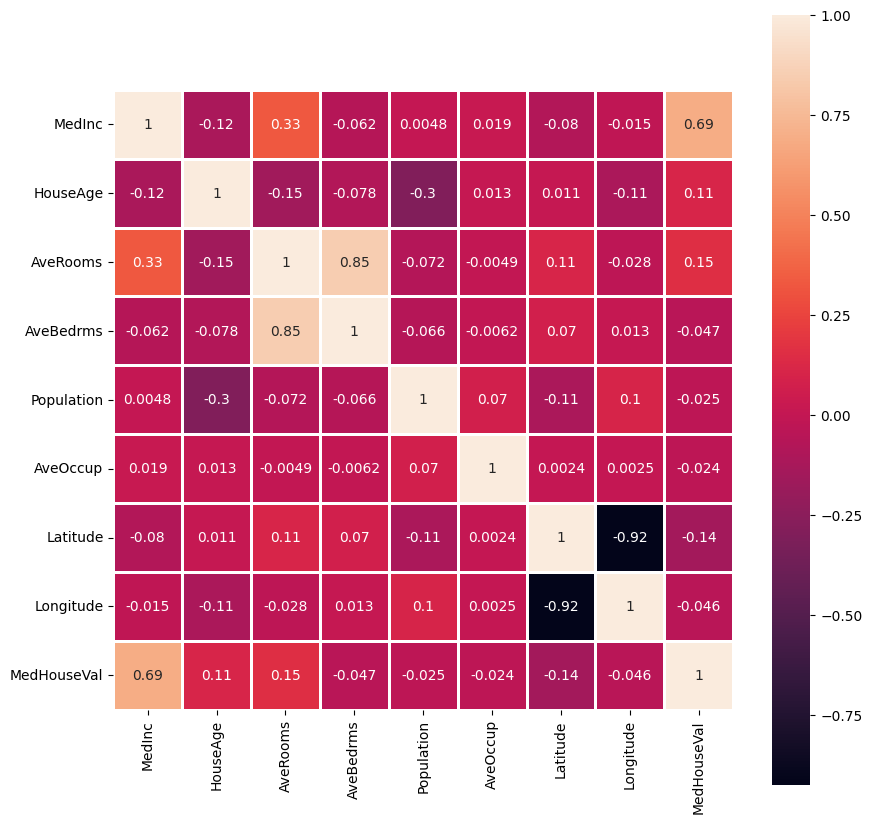

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr = full.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2);

In [37]:
# Vemos que hay dos features que estan correlacionadas entre ellas (r=-0,92):
# Latitude y Longitude. Por lo que con usar una de ellas es suficiente.

# Vemos que hay algunas variables que no tienen mucha relación (r~0,05) con el valor a precedir (Med HouseVal) por orden de menor relación:
# Ave Occup, Population, Longitude, AveRooms, HouseAge, Latitude,  MedInc. Esa última teniendo bastante correlación.

# Dado este análisis no consideríamos usar las siguientes features que tienen r~0,05:
# Ave Occup, Population, Longitude, AveRooms

# Si queremos usar 3 variables usaríamos:
# HouseAge, Latitude, MedInc.

# Y si queremos usar 2 variables usaríamos:
# Latitude, MedInc.

4- Divide el dataset en Train (75%) y Test (25%).

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=23)

5- Entrena un regresor y evalúa los datos de test.

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

6- Evalúa el modelo con las métricas R2 y RMSE.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_Lreg = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE value is = {}'.format(rmse_Lreg))

r2_Lreg = r2_score(y_test, y_pred)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 0.7209810733737028
R-squared value is 0.6148947803599633


7- Escoge únicamente 2 variables y entrena otro regresor.
¿Cuál ha funcionado mejor?

In [42]:
# Como hemos discutido en el punto 3 usamos:
# Latitude, MedInc.

X = full[["Latitude", "MedInc"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=23)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse_Lreg = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE value is = {}'.format(rmse_Lreg))

r2_Lreg = r2_score(y_test, y_pred)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 0.8299636705705307
R-squared value is 0.48967147716846726


* Resultado 1 (todas las variables):

R-squared: 0.6149

RMSE: 0.72098


* Resultado 2 (dos variables)

R-squared: 0.4897

RMSE: 0.82996


* En general, un R-squared más cercano a 1 indica un mejor ajuste del modelo a los datos, mientras que un RMSE más bajo indica un mejor rendimiento predictivo.
* Basándonos en estos valores, el Resultado 1 tiene un R-squared más alto y un RMSE más bajo, lo que sugiere un mejor rendimiento en comparación con el Resultado 2.
* Por lo tanto, la regresión lineal asociada al Resultado 1 ha funcionado mejor.

In [44]:
# Provando con 3 variables
# HouseAge,Latitude, MedInc.

X = full[["HouseAge", "Latitude", "MedInc"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=23)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse_Lreg = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE value is = {}'.format(rmse_Lreg))

r2_Lreg = r2_score(y_test, y_pred)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 0.7971627681918647
R-squared value is 0.5292116688475497


* Resultado 1 (todas las variables):

R-squared: 0.6149

RMSE: 0.72098

* Resultado 2 (dos variables):

R-squared: 0.4897

RMSE: 0.82996

* Resultado 3 (tres variables):

R-squared: 0.5292

RMSE: 0.79716

* Resultado 1 tiene el R-squared más alto y el RMSE más bajo, así que parece seguir siendo la mejor opción entre los tres modelos.